In [1]:
import sys
import os

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [2]:
from src.data_loader import load_news_data
df = load_news_data(r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

✅ Pandas valid dates: 55987 / 1407328


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\data_loader.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<DatetimeArray>
['2020-05-22 00:00:00', '2020-05-22 00:00:00', '2020-05-21 00:00:00',
 '2020-05-21 00:00:00', '2020-05-21 00:00:00', '2020-05-21 00:00:00',
 '2020-05-18 00:00:00', '2020-05-16 00:00:00', '2020-05-15 00:00:00',
 '2020-05-08 00:00:00',
 ...
 '2012-08-22 00:00:00', '2012-07-30 00:00:00', '2011-12-30 00:00:00',
 '2011-11-28 00:00:00', '2011-11-21 00:00:00', '2011-08-29 00:00:00',
 '2011-06-22 00:00:00', '2011-06-21 00:00:00', '2011-06-21 00:00:00',
 '2011-05-12 00:00:00']
Length: 1351341, dtype: datetime64[ns]' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df.loc[missing_mask, 'date_parsed'] = df.loc[missing_mask, 'date'].apply(try_dateutil)


✅ Total valid after dateutil: 1407328 / 1407328


as you can see only 55,987 dates are valid which is abnormal and the case might be as we are working with real-world data, date columns often contain values in a variety of formats—or even include messy, invalid entries. Standardizing these dates is essential for reliable analysis, filtering, and time series operations.

## Handling Date Parsing for Inconsistent Formats

 To maximize data recovery, we use a two-step approach for date parsing:

1. **Fast, Vectorized Parsing:**  
   First, we use `pandas.to_datetime` to efficiently parse any standard date formats across the entire dataset. This method is fast and handles the majority of typical date representations.

2. **Fallback with Dateutil:**  
   For rows where pandas fails to recognize the date format, we apply `dateutil.parser.parse` row-by-row. This parser is more flexible and tolerant of irregular or non-standard formats but is significantly slower, so it is used only for the remaining problematic rows.

After both steps, we standardize all successfully parsed dates into a uniform string format (`YYYY-MM-DD HH:MM:SS`) for consistency and downstream analysis. Rows with unparseable dates are excluded to ensure data integrity in subsequent analyses.


Data often has extra spaces (e.g., ' 2025-05-28 '), which can mess up date parsing and comparisons.
so By cleaning the column like this, you reduce errors in later processing—especially when converting to datetime.
so the method .str.strip()
Removes any leading or trailing whitespace (spaces, tabs, newlines, etc.) from each string in the column.

In [3]:
print("Total rows:", len(df))
print("Valid dates:", df['date'].notna().sum())
print("Null dates:", df['date'].isna().sum())

# Optional: Check what % are valid
print("Valid %:", df['date'].notna().mean() * 100)

Total rows: 1407328
Valid dates: 1407328
Null dates: 0
Valid %: 100.0


In [4]:
#df.to_csv(r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\clean_analyst_rating.csv', index=False)


In [5]:
import pandas as pd
from src.data_cleaning import parse_dates_column



# Parse dates (modular)
df = parse_dates_column(df, 'date', new_column='parsed_date')





### What Does This Module Do?
Standardizes a date column in your DataFrame, handling mixed or inconsistent formats.

Uses a two-step parsing approach for maximum robustness:

First pass: Attempts to parse dates with pandas.to_datetime() (fast and vectorized).

Second pass: Applies a custom robust_parse() function, leveraging dateutil.parser to parse entries that failed the first step (e.g., unusual, non-standard formats).

Returns a new column (parsed_date by default) containing clean, standardized datetime values, or NaT for truly invalid rows.

SO our method works well with 0 null dates.it worked!

In [6]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,parsed_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54,A,2020-06-05 14:30:54
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20,A,2020-06-03 14:45:20
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07,A,2020-05-26 08:30:07
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06,A,2020-05-22 16:45:06
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59,A,2020-05-22 15:38:59


In [16]:

for value in df['stock'].unique():
    print(value)



A
AA
AAC
AADR
AAL
AAMC
AAME
AAN
AAOI
AAON
AAP
AAPL
AAU
AAV
AAVL
AAWW
AAXJ
AB
ABAC
ABAX
ABB
ABBV
ABC
ABCB
ABCD
ABCO
ABCW
ABDC
ABEV
ABG
ABGB
ABIO
ABM
ABMD
ABR
ABTL
ABX
ABY
ACAD
ACAS
ACAT
ACC
ACCO
ACCU
ACE
ACET
ACFC
ACFN
ACG
ACGL
ACH
ACHC
ACHN
ACIW
ACLS
ACM
ACMP
ACN
ACNB
ACOR
ACP
ACPW
ACRE
ACRX
ACSF
ACST
ACT
ACTA
ACTG
ACTS
ACU
ACUR
ACWI
ACWV
ACWX
ACXM
ACY
ADAT
ADBE
ADC
ADEP
ADES
ADGE
ADHD
ADI
ADK
ADM
ADMA
ADMP
ADMS
ADNC
ADP
ADPT
ADRA
ADRD
ADRE
ADRU
ADS
ADSK
ADT
ADTN
ADVS
ADX
ADXS
ADZ
AE
AEB
AEC
AEE
AEG
AEGN
AEGR
AEHR
AEIS
AEL
AEM
AEO
AEPI
AER
AERI
AES
AET
AETI
AEY
AEZS
AF
AFA
AFAM
AFB
AFC
AFCB
AFFX
AFG
AFH
AFK
AFL
AFMD
AFOP
AFSI
AFT
AG
AGA
AGC
AGCO
AGD
AGEN
AGF
AGG
AGII
AGIO
AGM
AGN
AGNC
AGNCB
AGND
AGO
AGOL
AGQ
AGRO
AGRX
AGTC
AGU
AGX
AGYS
AHC
AHGP
AHH
AHL
AHP
AHPI
AHT
AI
AIA
AIB
AIF
AIG
AIMC
AIN
AINC
AINV
AIQ
AIR
AIRM
AIRT
AIT
AIV
AIXG
AIZ
AJG
AKAM
AKAO
AKBA
AKER
AKG
AKP
AKR
AKRX
AKS
AL
ALB
ALCO
ALD
ALDR
ALDW
ALDX
ALE
ALEX
ALFA
ALG
ALGN
ALGT
ALIM
ALJ
ALK
ALKS
ALL
ALLB
ALLE
ALLT
ALLY
ALNY


In [8]:

# Add character count and word count for each headline
df['headline_length'] = df['headline'].astype(str).str.len()
df['headline_word_count'] = df['headline'].astype(str).str.split().apply(len)


In [9]:

print("Character Length Statistics:")
print(df['headline_length'].describe())

print("\nWord Count Statistics:")
print(df['headline_word_count'].describe())


Character Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Word Count Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_word_count, dtype: float64


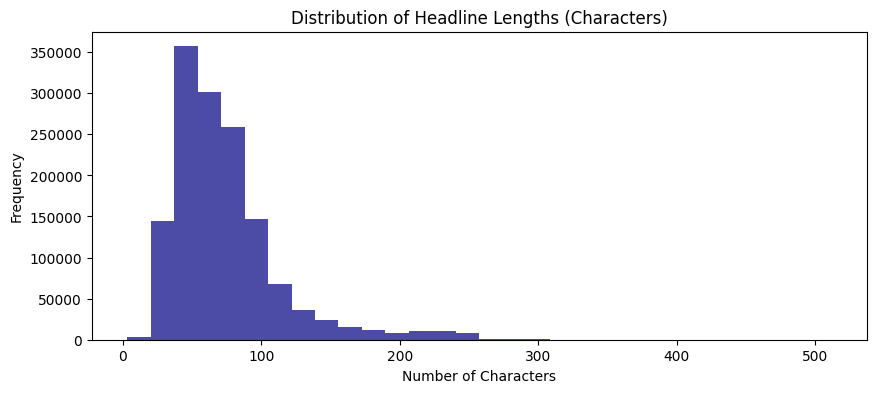

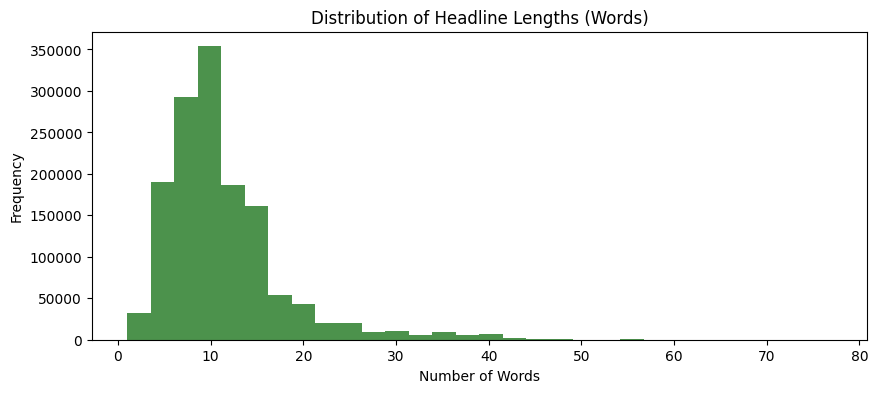

In [10]:
from src.visualization import plot_histogram

# Headline character length
plot_histogram(df, 'headline_length', color='navy', title='Distribution of Headline Lengths (Characters)', xlabel='Number of Characters')

# Headline word count
plot_histogram(df, 'headline_word_count', color='darkgreen', title='Distribution of Headline Lengths (Words)', xlabel='Number of Words')



Interpretation
X-axis (Number of Words):
Shows the length of headlines in terms of word count, ranging from 0 to 80 words.

Y-axis (Frequency):
Indicates how many headlines fall into each word count category.

Key Observations:
Most Headlines Are Short:

The distribution is heavily right-skewed (long tail to the right).

Majority of headlines have between 5 and 15 words.

The most common headline length appears to be around 10 words (the highest bar/frequency).

Few Very Long Headlines:

Headline counts rapidly drop off after about 15–20 words.

Very few headlines have more than 30 words.

Beyond 40 words, headlines are extremely rare.

Practical Insight:

Shorter headlines are far more common—likely because concise headlines are more effective and preferred in journalism and media.

Outliers exist (some headlines have 50–80 words), but these are very rare and may be errors or special cases.



In [11]:
from src.statistics import most_active_publishers
publisher_count = most_active_publishers(df,'publisher', 10)
print("\nMost Active Publishers:")
print(publisher_count)



Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


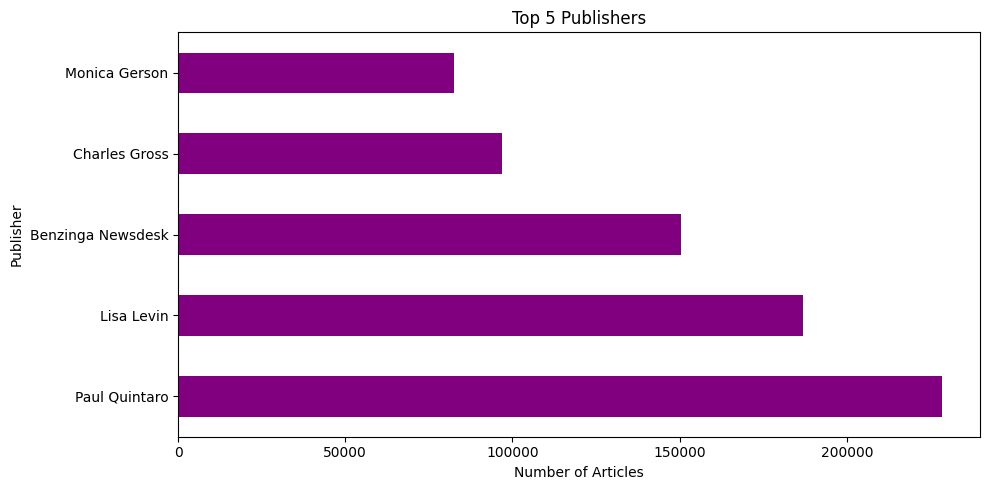

In [12]:
from src.visualization import plot_bar
# Top 5 publishers, horizontal bar chart
plot_bar(
    publisher_count,
    title="Top 5 Publishers",
    xlabel="Publisher",
    ylabel="Number of Articles",
    color="purple",
    top_n=5,
    horizontal=True
)

In [13]:
import pandas as pd
from src.statistics import mean_median_mode_stats



stats_dict = mean_median_mode_stats(df, 'headline_word_count')
print(f"Mean: {stats_dict['mean']:.2f}")
print(f"Median: {stats_dict['median']}")
print(f"Mode: {stats_dict['mode']}")


Mean: 11.42
Median: 10.0
Mode: 7


The distribution of headline lengths (in words) is highly concentrated between 5 and 15 words, peaking near 10 words. Very long headlines are rare, and the overall trend shows that brevity is the norm in headline writing.

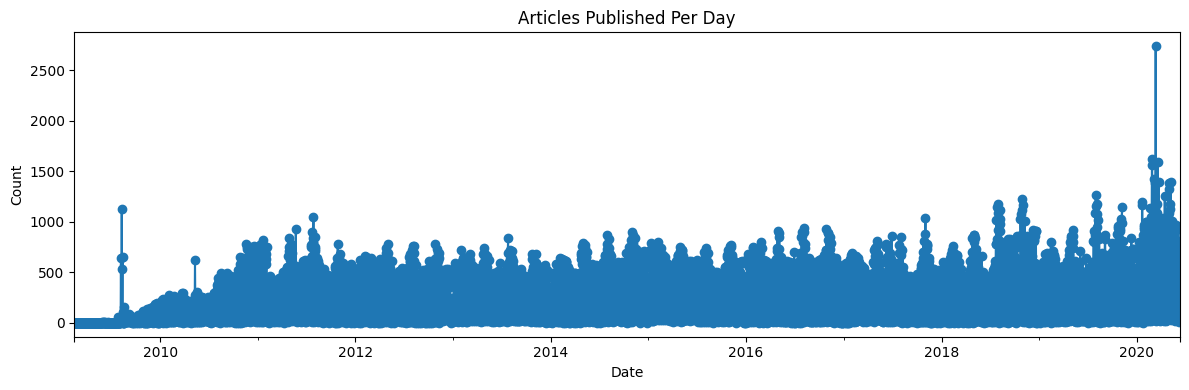

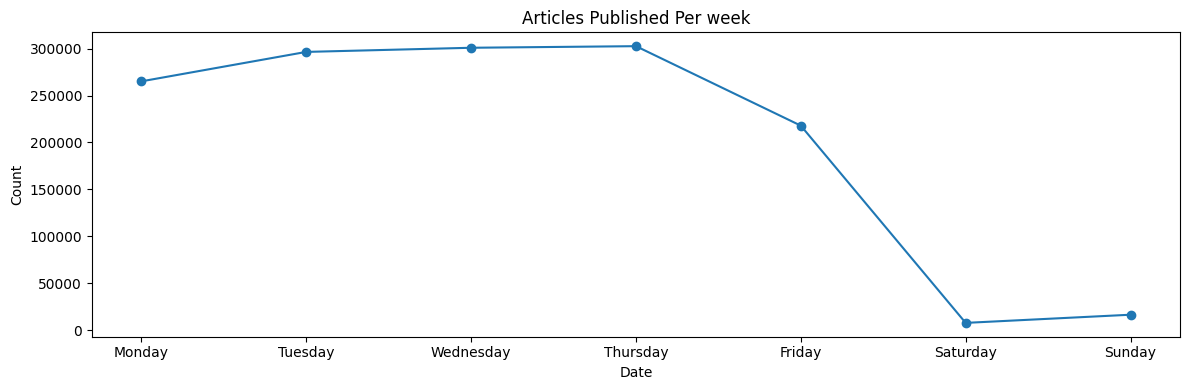

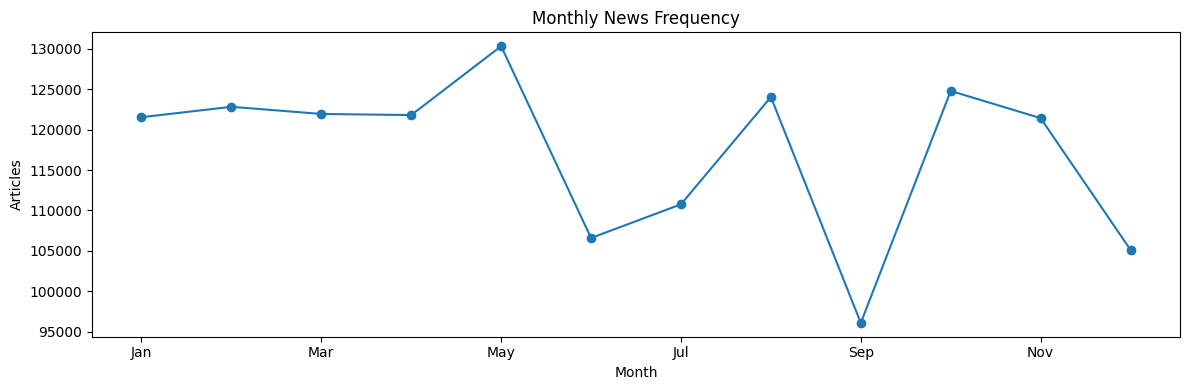

In [14]:
from src.statistics import article_counts_by_period, article_counts_by_weekday,article_counts_by_calendar_month
from src.visualization import plot_time_trend

# Trend by day
daily_counts = article_counts_by_period(df, period='D')


monthly_counts = article_counts_by_calendar_month(df, date_col='date')



# By weekday
weekday_counts = article_counts_by_weekday(df)

plot_time_trend(
    daily_counts, 
    title="Articles Published Per Day", 
    xlabel="Date", 
    ylabel="Count"
)
plot_time_trend(
    weekday_counts, 
    title="Articles Published Per week", 
    xlabel="Date", 
    ylabel="Count"
)

plot_time_trend(
    monthly_counts, 
    title="Monthly News Frequency", 
    xlabel="Month", 
    ylabel="Articles"
)


more news is published in 2020 and from monday to frieday while saturday and suday shows less publication 



in months There is a clear seasonal pattern in news publication.

January to June:

The number of articles steadily increases, with a rapid surge especially from March to May.

May is the peak month, with the highest number of articles—over 11,000.

June to July:

There is a sharp drop after June, reaching the lowest point in July.

July to December:

After July, the frequency remains relatively low and stable with minor fluctuations.

Slight increases are observed in the last quarter, but not close to the earlier peak.

Most Active Period:

Spring to early Summer (March–June) is the most active period for article publication.

May stands out as the most news-intensive month.

Least Active Period:

July is the lowest point, possibly due to holidays, vacation periods, or industry slowdowns.

The rest of the year (August–December) remains consistently lower than the first half.

In [15]:
import talib
print(talib.__version__)


0.6.3
